<a href="https://colab.research.google.com/github/tismol/NLP/blob/main/NLP_T_SOLOSCHENKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача определения частей речи, Part-Of-Speech Tagger (POS) (10 баллов)

Мы будем решать задачу определения частей речи (POS-теггинга).

In [3]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import brown
import matplotlib.pyplot as plt

Чтобы решить задание, почитайте http://www.nltk.org/book/

Загрузим brown корпус

In [4]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

<b>Существует не одна система тегирования, поэтому будьте внимательны, когда прогнозируете тег слов в тексте и вычисляете качество прогноза. Можете получить несправедливо низкое качество вашего решения.

Cейчас будем использовать универсальную систему тегирования universal_tagset

In [5]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

Мы имеем массив предложений пар (слово-тег)

In [6]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
brown_tagged_sents

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

Первое предложение

In [7]:
brown_tagged_sents[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

Все пары (слово-тег)

In [8]:
brown_tagged_words = brown.tagged_words(tagset='universal')
brown_tagged_words

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Проанализируйте данные, с которыми Вы работаете. Используйте `nltk.FreqDist()` для подсчета частоты встречаемости тега и слова в нашем корпусе. Под частой элемента подразумевается кол-во этого элемента в корпусе.

In [9]:
# Приведем слова к нижнему регистру
brown_tagged_words = list(map(lambda x: (x[0].lower(), x[1]), brown_tagged_words))

In [10]:
print('Кол-во предложений: ', len(brown_tagged_sents))
tags = [tag for (word, tag) in brown_tagged_words] # наши теги
words = [word for (word, tag) in brown_tagged_words] # наши слова

tag_num = pd.Series(data = nltk.FreqDist(tags), index = set(tags)).sort_values(ascending=False) # тег - кол-во тега в корпусе
word_num = pd.Series(data = nltk.FreqDist(words), index = set(words)).sort_values(ascending=False) # слово - кол-во слова в корпусе

Кол-во предложений:  57340


In [11]:
tag_num

NOUN    275558
VERB    182750
.       147565
ADP     144766
DET     137019
ADJ      83721
ADV      56239
PRON     49334
CONJ     38151
PRT      29829
NUM      14874
X         1386
dtype: int64

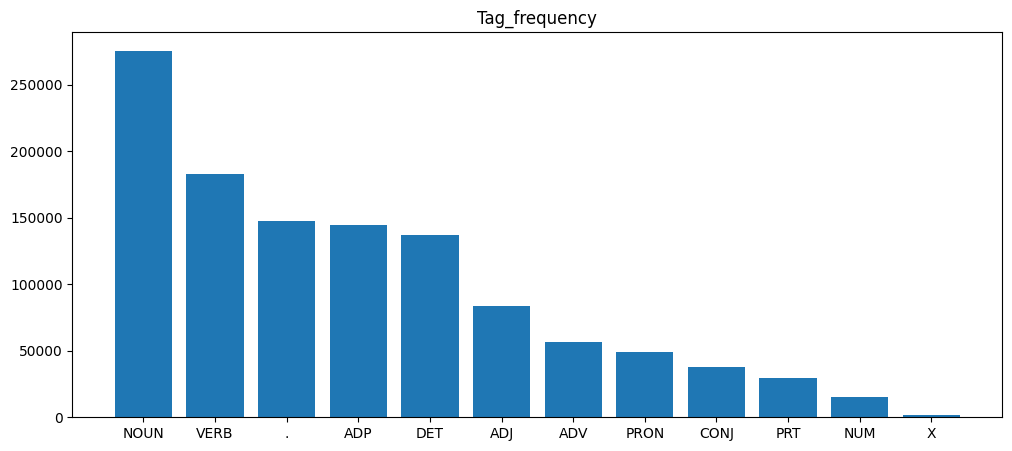

In [12]:
plt.figure(figsize=(12, 5))
plt.bar(tag_num.index, tag_num.values)
plt.title("Tag_frequency")
plt.show()

In [13]:
word_num[:5]

the    69971
,      58334
.      49346
of     36412
and    28853
dtype: int64

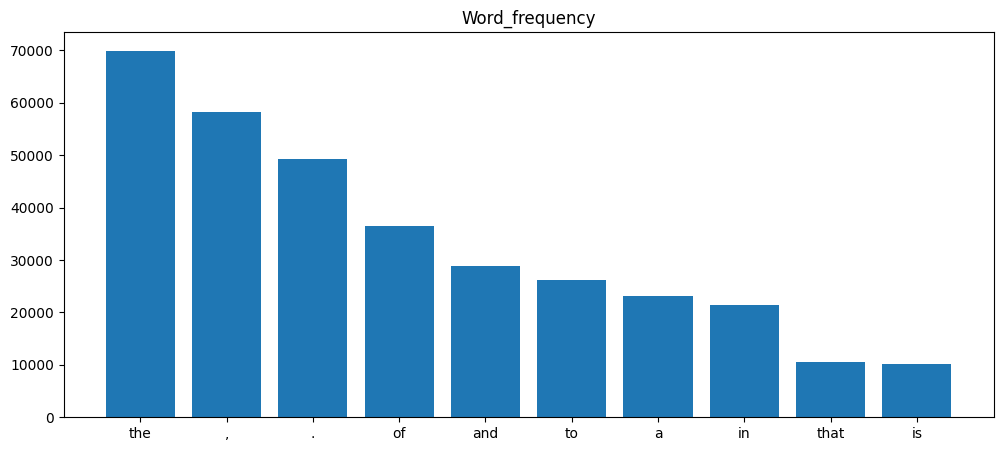

In [14]:
plt.figure(figsize=(12, 5))
plt.bar(word_num.index[:10], word_num.values[:10])
plt.title("Word_frequency")
plt.show()

### Вопрос 1:
* Кол-во слова `cat` в корпусе? **(0.5 балл)**

In [15]:
word_num['cat']

23

### Вопрос 2:
* Самое популярное слово с самым популярным тегом? **(0.5 балл)**


In [16]:
# Выбираем сначала слова с самым популярным тегом, а затем среди них выбираем самое популярное слово.
words_with_the_most_popular_tag = [word for (word,tag) in brown_tagged_words if tag == tag_num.index[0]]
noun_num= pd.Series(data = nltk.FreqDist(words_with_the_most_popular_tag), index = set(words_with_the_most_popular_tag)).sort_values(ascending=False)
print(noun_num.index[0],noun_num[0])
noun_num

time 1597


time            1597
man             1203
af               995
years            949
way              899
                ... 
crashes            1
adair's            1
vasilievitch       1
$63.8              1
preview            1
Length: 30246, dtype: int64

Cделайте разбиение выборки на обучение и контроль в отношении 9:1. **(0.5 балл)**

In [17]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
# Приведем слова к нижнему регистру
my_brown_tagged_sents = []
for sent in brown_tagged_sents:
    my_brown_tagged_sents.append(list(map(lambda x: (x[0].lower(), x[1]), sent)))
my_brown_tagged_sents = np.array(my_brown_tagged_sents)

from sklearn.model_selection import train_test_split
train_sents, test_sents = train_test_split(my_brown_tagged_sents,test_size = 0.1, random_state=0,)

<ipython-input-17-68ad0465fbf1>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  my_brown_tagged_sents = np.array(my_brown_tagged_sents)


In [18]:
len(train_sents), len(test_sents)

(51606, 5734)

## DefaultTagger

### Вопрос 3:
* Какое качество вы бы получили, если бы предсказывали любой тег, как самый популярный тег на выборке train(округлите до одного знака после запятой)? **(0.5 балл)**

Вы можете использовать DefaultTagger(метод tag для предсказания частей речи предложения).

In [19]:
from nltk.tag import DefaultTagger
default_tagger = DefaultTagger(tag_num.index[0])

In [20]:
true_pred = 0
num_pred = 0

for sent in test_sents:
    tags = np.array([tag for (word, tag) in sent])
    words = np.array([word for (word, tag) in sent])

    tagged_sent = default_tagger.tag(words)
    outputs = [tag for token, tag in tagged_sent]
    true_pred += len([word for (word,tag) in sent if tag == tag_num.index[0]])
    num_pred += len(words)

print("Accuracy:", true_pred / num_pred * 100, '%')

Accuracy: 23.47521651004238 %


## LSTMTagger

### Подготовка данных

Изменим структуру данных

In [21]:
pos_data = [list(zip(*sent)) for sent in brown_tagged_sents]
print(pos_data[0])

[('The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'), ('DET', 'NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'VERB', '.', 'DET', 'NOUN', '.', 'ADP', 'DET', 'NOUN', 'VERB', 'NOUN', '.')]


Используем pytorch

In [22]:
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2


In [23]:
from torchtext.data import Field, BucketIterator
import torchtext
# наши поля
WORD = Field(lower=True)
TAG = Field(unk_token=None) # все токены нам извсетны

# создаем примеры
examples = []
for words, tags in pos_data:
    examples.append(torchtext.data.Example.fromlist([list(words), list(tags)], fields=[('words', WORD), ('tags', TAG)]))

Вот один пример:

In [24]:
print(vars(examples[0]))

{'words': ['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], 'tags': ['DET', 'NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'VERB', '.', 'DET', 'NOUN', '.', 'ADP', 'DET', 'NOUN', 'VERB', 'NOUN', '.']}


Теперь формируем наш датасет

In [25]:
# кладем примеры в наш датасет
dataset = torchtext.data.Dataset(examples, fields=[('words', WORD), ('tags', TAG)])

train_data, valid_data, test_data = dataset.split(split_ratio=[0.8, 0.1, 0.1])

print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")


Number of training examples: 45872
Number of validation examples: 5734
Number of testing examples: 5734


Построим словари. Параметр `min_freq` выберете сами. При построении словаря испольузем только **train** **(0.5 балл)**

In [26]:
WORD.build_vocab(train_data, min_freq=0)
TAG.build_vocab(train_data)

print(f"Unique tokens in source (ru) vocabulary: {len(WORD.vocab)}")
print(f"Unique tokens in target (en) vocabulary: {len(TAG.vocab)}")

print(WORD.vocab.itos[::200])
print(TAG.vocab.itos)

Unique tokens in source (ru) vocabulary: 45188
Unique tokens in target (en) vocabulary: 13
['<unk>', 'course', 'boy', 'lost', 'record', 'poor', 'thin', 'h.', 'lips', 'moon', 'governments', 'troops', 'cuba', 'wire', 'involves', 'tough', 'corn', 'trail', 'prevention', 'disaster', 'prevented', 'witnesses', 'voted', '1950', '28', 'spare', 'ma', 'cracked', 'talks', 'investors', 'believing', 'mistakes', 'brace', 'madame', 'acid', 'hawk', 'serene', 'colorado', 'insulation', "scotty's", 'artillery', 'faithful', "papa's", 'trophy', 'cf.', 'fletcher', 'mourning', 'shaefer', '1832', 'civilizational', 'finances', 'laymen', 'probe', 'superbly', 'accompany', 'calenda', 'dingy', 'glen', 'lied', 'placid', 'secondly', 'tories', '73', 'birth-control', 'constellations', 'drumming', 'forty-nine', 'impinging', 'macbeth', 'pageants', 'reassured', 'simon', 'thirst', "water's", 'addicts', 'barstow', 'carolinians', 'contradictions', 'discriminatory', 'expansions', 'grabski', 'inaugurated', "lady's", 'memorized

Здесь вы увидете токен `unk` и `pad`. Первый служит для обозначения слов, которых у нас нет в словаре. Второй служит для того, что объекты в одном батче были одинакового размера.

In [27]:
print(vars(train_data.examples[9]))

{'words': ['the', 'man', 'swayed', 'on', 'a', 'thwart', ',', 'turning', 'his', 'ruined', 'eyes', 'from', 'side', 'to', 'side', '.'], 'tags': ['DET', 'NOUN', 'VERB', 'ADP', 'DET', 'NOUN', '.', 'VERB', 'DET', 'VERB', 'NOUN', 'ADP', 'NOUN', 'ADP', 'NOUN', '.']}


Посмотрим с насколько большими предложениями мы имеем дело

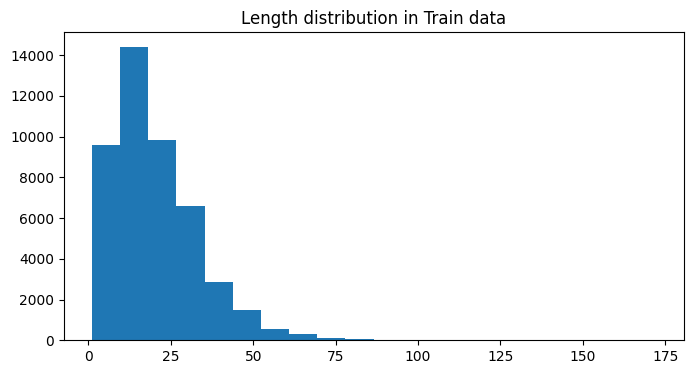

In [28]:
length = map(len, [vars(x)['words'] for x in train_data.examples])

plt.figure(figsize=[8, 4])
plt.title("Length distribution in Train data")
plt.hist(list(length), bins=20);

Для обучения `LSTM` лучше использовать colab

In [29]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Для более быстрого и устойчивого обучения сгруппируем наши данные по батчам

In [30]:
# бьем нашу выборку на батч, не забывая сначала отсортировать выборку по длине
def _len_sort_key(x):
    return len(x.words)

BATCH_SIZE = 32

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size = BATCH_SIZE,
    device = device,
    sort_key=_len_sort_key
)

In [31]:
# посморим  на количество батчей
list(map(len, [train_iterator, valid_iterator, test_iterator]))

[1434, 180, 180]

### Модель и её обучение

Инициализируем нашу модель. Прочитайте про dropout [тут](https://habr.com/ru/company/wunderfund/blog/330814/). **(3 балла)**

In [32]:
class LSTMTagger(nn.Module):

    def __init__(self, input_dim, emb_dim, hid_dim, output_dim, dropout):
        super().__init__()


        self.embeddings = nn.Embedding(input_dim, emb_dim)
        self.dropout = nn.Dropout(p=dropout)

        self.rnn = nn.LSTM(emb_dim, hid_dim)
        self.tag = nn.Linear(hid_dim, output_dim)

    def forward(self, sent):

        #sent = [sent len, batch size]

        # не забываем применить dropout к embedding
        embedded = self.dropout(self.embeddings(sent))

        output, _ = self.rnn(embedded)
        #output = [sent len, batch size, hid dim * n directions]

        prediction = self.tag(output)

        return prediction

# параметры модели
INPUT_DIM = len(WORD.vocab)
OUTPUT_DIM = len(TAG.vocab)
EMB_DIM = 100
HID_DIM = 128
DROPOUT = 0.5

model = LSTMTagger(INPUT_DIM, EMB_DIM,HID_DIM,OUTPUT_DIM,DROPOUT).to(device)

# инициализируем веса
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param, -0.08, 0.08)

model.apply(init_weights)

LSTMTagger(
  (embeddings): Embedding(45188, 100)
  (dropout): Dropout(p=0.5, inplace=False)
  (rnn): LSTM(100, 128)
  (tag): Linear(in_features=128, out_features=13, bias=True)
)

Подсчитаем количество обучаемых параметров нашей модели. Используйте метод `numel()`. **(1 балл)**

In [33]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 4,638,237 trainable parameters


Погнали обучать **(2 балла)**

In [34]:
PAD_IDX = TAG.vocab.stoi['<pad>']
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)

def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    model.train()

    epoch_loss = 0
    history = []
    for i, batch in enumerate(iterator):

        words = batch.words
        tags = batch.tags

        optimizer.zero_grad()

        output = model(words)

        #tags = [sent len, batch size]
        #output = [sent len, batch size, output dim]

        output = output.view(-1, output.shape[-1])
        tags = tags.view(-1)


        #tags = [sent len * batch size]
        #output = [sent len * batch size, output dim]

        loss = criterion(output, tags)

        loss.backward()

        # Gradient clipping(решение проблемы взрыва граденты), clip - максимальная норма вектора
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        optimizer.step()

        epoch_loss += loss.item()

        history.append(loss.cpu().data.numpy())
        if (i+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')

            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()

            plt.show()


    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()

    epoch_loss = 0

    history = []

    with torch.no_grad():

        for i, batch in enumerate(iterator):

            words = batch.words
            tags = batch.tags

            output = model(words)

            #tags = [sent len, batch size]
            #output = [sent len, batch size, output dim]

            output = output.view(-1, output.shape[-1])
            tags = tags.view(-1)

            #tags = [sent len * batch size]
            #output = [sent len * batch size, output dim]

            loss = criterion(output, tags)


            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

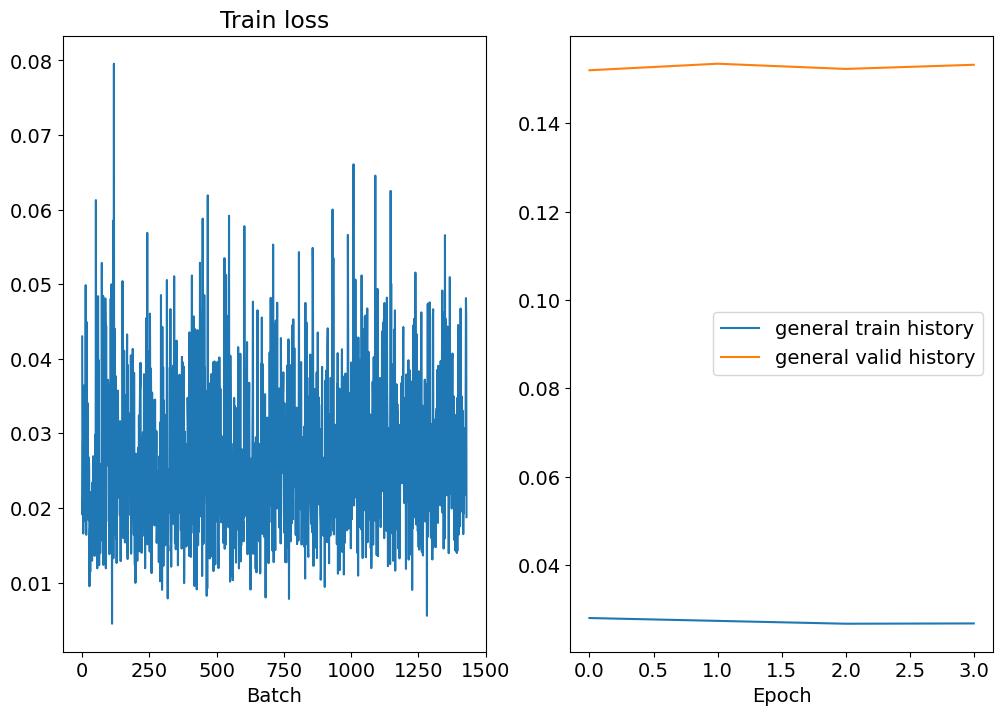

Epoch: 05 | Time: 1m 15s
	Train Loss: 0.026 | Train PPL:   1.027
	 Val. Loss: 0.156 |  Val. PPL:   1.169


In [52]:
import time
import math
import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

train_history = []
valid_history = []

N_EPOCHS = 5
CLIP = 1.0

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-val-model.pt')

    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

### Применение модели
 **(1 балл)**

In [53]:
def accuracy_model(model, iterator):
    model.eval()

    true_pred = 0
    num_pred = 0

    with torch.no_grad():
        for i, batch in enumerate(iterator):

            words = batch.words
            tags = batch.tags

            output = model(words)

            #output = [sent len, batch size, output dim]
            # Выбираем для каждого слова индекс тэга с максимальной вероятностью
            output = output.argmax(dim=-1)

            #output = [sent len, batch size]
            predict_tags = output.cpu().numpy()
            true_tags = tags.cpu().numpy()

            true_pred += np.sum((true_tags == predict_tags) & (true_tags != PAD_IDX))
            num_pred += np.prod(true_tags.shape) - (true_tags == PAD_IDX).sum()

    return round(true_pred / num_pred * 100, 3)

In [54]:
print("Accuracy:", accuracy_model(model, test_iterator), '%')

Accuracy: 96.308 %


Вы можете улучшить качество, изменяя параметры модели. Вам неоходимо добиться качества не меньше, чем `accuracy = 92 %`.

In [55]:
best_model = LSTMTagger(INPUT_DIM, EMB_DIM, HID_DIM, OUTPUT_DIM, DROPOUT).to(device)
best_model.load_state_dict(torch.load('best-val-model.pt'))
assert accuracy_model(best_model, test_iterator) >= 92

### **Если качество сети меньше 92 процентов, то снимается половина от всех полученных баллов .<br> То есть максимум в этом случае 5 баллов за работу.**




Пример решение нашей задачи:

In [56]:
def print_tags(model, data):
    model.eval()

    with torch.no_grad():
        words, _ = data
        example = torch.LongTensor([WORD.vocab.stoi[elem] for elem in words]).unsqueeze(1).to(device)

        output = model(example).argmax(dim=-1).cpu().numpy()
        tags = [TAG.vocab.itos[int(elem)] for elem in output]

        for token, tag in zip(words, tags):
            print(f'{token:15s}{tag}')

In [57]:
print_tags(model, pos_data[-1])

From           NOUN
what           DET
I              VERB
was            VERB
able           ADJ
to             PRT
gauge          NOUN
in             ADP
a              DET
swift          ADJ
,              .
greedy         ADJ
glance         NOUN
,              .
the            DET
figure         NOUN
inside         ADP
the            DET
coral-colored  ADJ
boucle         NOUN
dress          NOUN
was            VERB
stupefying     VERB
.              .


## Вывод:
**(0.5 балл)**

Модель точно определяет часть речи для слов, которые могут быть только одной конкретной частью речи (ex. greedy, was, a, ','), но неточно для таких слов как stupefying(во-первых, это слово редкое, во-вторых, оно может быть в предложении как глаголом, так и прилагательным)